# **Exercise Sheet 1: Clustering**

In [2]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, silhouette_score, adjusted_mutual_info_score
from clustpy.metrics import unsupervised_clustering_accuracy
from clustpy.deep import SynC
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import densired as ds

## **Exercise 1-1** *Simple generation and visualization of data*

### **a)** Create some data using python and sklearn, e.g., with make_blobs


In [2]:
# data generation
X, y = make_blobs()

In [3]:
X[:10,:]

array([[ 1.13066295,  6.4507632 ],
       [ 2.50748875, -6.71677057],
       [-7.43646648,  8.56737437],
       [ 0.31672727,  6.07462623],
       [ 5.99831621, -5.85155493],
       [-8.69215554,  8.14533272],
       [ 4.63582507, -6.1357091 ],
       [ 0.78121321,  5.26837025],
       [-7.16736777,  8.52523281],
       [ 3.72345562, -6.88884135]])

### **b)** Visualize any two dimensions of the data in a 2d scatter plot, e.g., using matplotlib or seaborn.

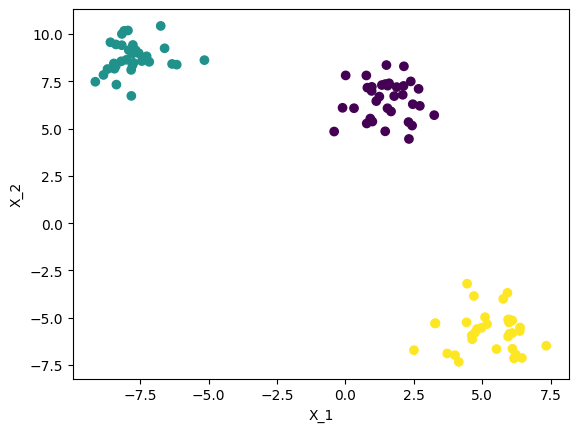

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

### **c)** Visualize the data along its two main principal components OR using a tSNE visualization

In [5]:
# scale data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_scaled)

In [7]:
# Alternative using tSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

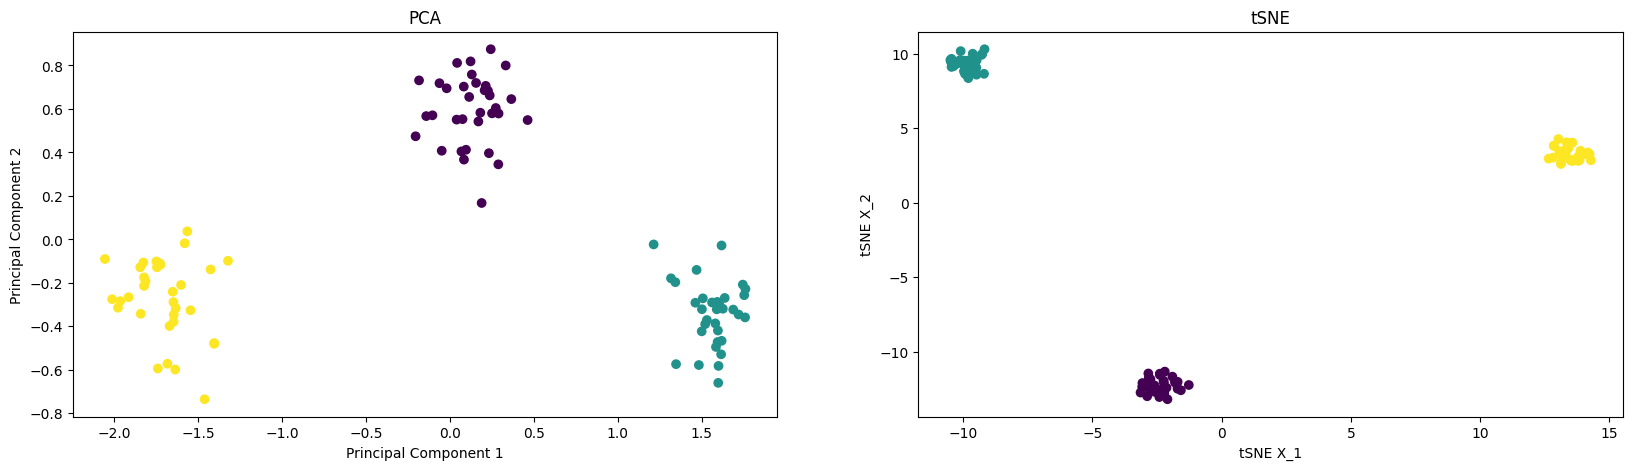

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(X_principal[:,0],X_principal[:,1],c=y)
plt.title("PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(122)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y)
plt.title("tSNE")
plt.xlabel("tSNE X_1")
plt.ylabel("tSNE X_2")

plt.show()

## **Exercise 1-2** *Different cluster algorithms solve different purposes*

### **a)** *Create data that contains at least three density-based clusters that cannot be detected correctly by k-Means. Print the average NMI of the clusters that k-Means finds over 10 runs (if you did everythingcorrectly, it should be lower than 1.0).*

In [3]:
X_moons, y_moons = make_moons()
X_tmp,y_tmp = make_moons()
X_tmp[:,0] = X_tmp[:,0]+2.5
X_moons = np.concatenate((X_moons,X_tmp),axis=0)
y_tmp = np.array([(entry+2) for entry in y_tmp])
y_moons = np.concatenate((y_moons,y_tmp),axis=0)

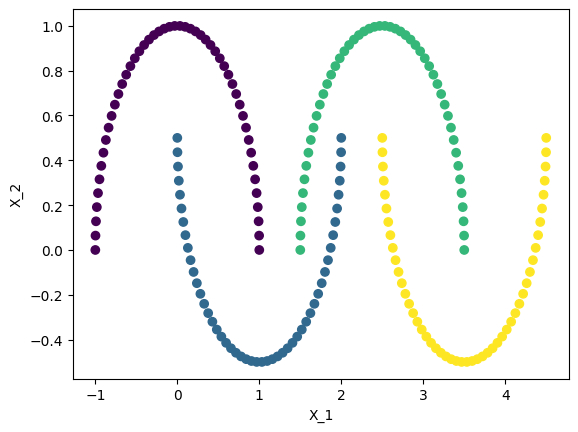

In [4]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

In [24]:
sync = SynC(epsilon=0.5, clustering_precision=1)
y_moons_sync, synchronized_points = sync.fit_predict(X_moons)

moons_sync_nmi = normalized_mutual_info_score(y_moons,y_moons_sync)
moons_sync_acc = unsupervised_clustering_accuracy(y_moons,y_moons_sync)
moons_sync_ari = adjusted_rand_score(y_moons, y_moons_sync)
moons_sync_ami = adjusted_mutual_info_score(y_moons,y_moons_sync)
print(f"NMI: {moons_sync_nmi}, ACC: {moons_sync_acc}, ARI: {moons_sync_ari}, AMI: {moons_sync_ami}")

NMI: 0.7446179258502434, ACC: 0.69, ARI: 0.6446044838728434, AMI: 0.7381557666768334


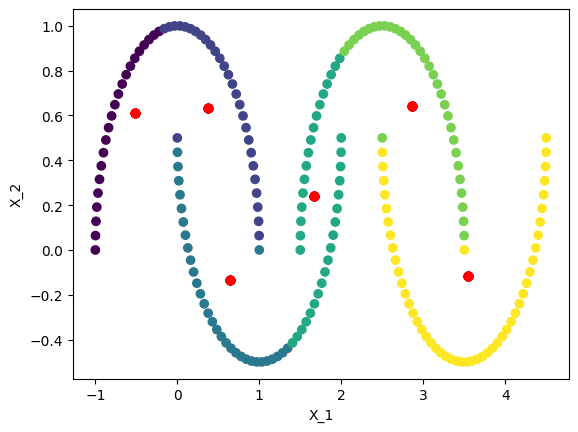

In [12]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons_sync)
plt.scatter(synchronized_points[:,0],synchronized_points[:,1],c="red")
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

In [11]:
kmeans_10 = KMeans(n_clusters=4, max_iter=10)
kmeans = KMeans(n_clusters=4)
y_moons_kmeans = kmeans_10.fit_predict(X_moons)
nmi = normalized_mutual_info_score(y_moons,y_moons_kmeans)
print(nmi)
nmi_10 = 0
for _ in range(10):
    y_moons_kmeans_tmp = kmeans.fit_predict(X_moons)
    nmi_10 += normalized_mutual_info_score(y_moons,y_moons_kmeans_tmp)
nmi_10 /= 10
print(nmi_10)

0.449549972631033
0.44739569504951227


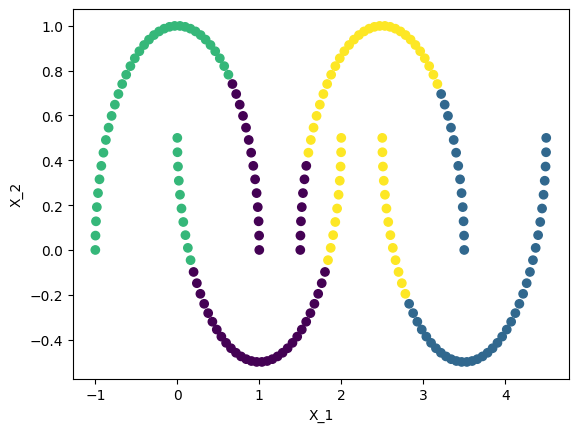

In [12]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons_kmeans)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

### **b)** *Create data that has at least four dimensions and contains at least four clusters that cannot be detected correctly by k-Means. Simultaneously, they should be detected correctly by DBSCAN. Give the parameters with which DBSCAN can find those clusters. You may use the data generator DENSIRED, but you don’t have to.*

In [13]:
data_generator = ds.densityDataGen(dim=4, clunum=4, momentum=1, step=2)#dim=4
test_data = data_generator.generate_data(1000)


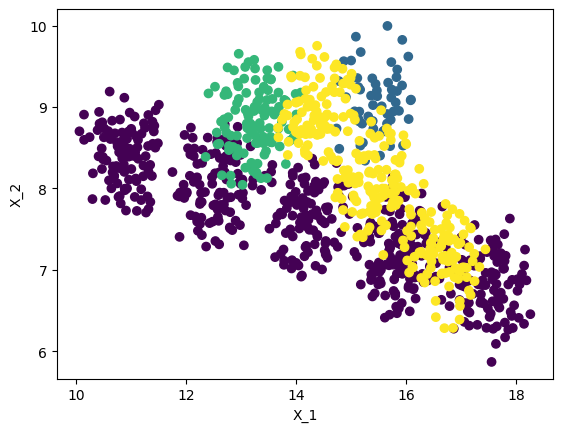

In [14]:
plt.scatter(test_data[:,0],test_data[:,1],c=test_data[:,-1])
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

In [15]:
dbscan = DBSCAN(eps=.7,min_samples=10)
y_test_kmeans = kmeans.fit_predict(test_data[:,:-1])
y_test_dbscan = dbscan.fit_predict(test_data[:,:-1])
print(normalized_mutual_info_score(test_data[:,-1],y_test_kmeans))
print(normalized_mutual_info_score(test_data[:,-1],y_test_dbscan))

0.7437329160571833
1.0


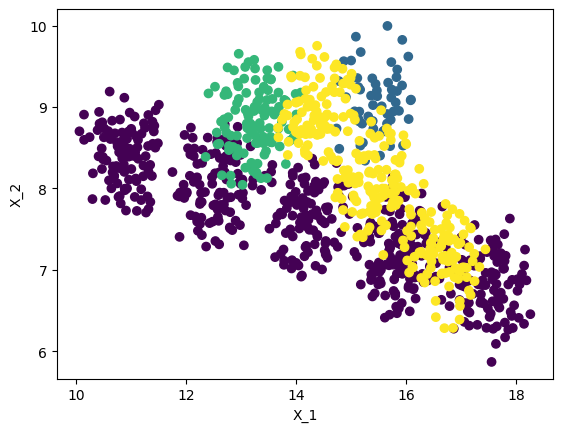

In [16]:
plt.scatter(test_data[:,0],test_data[:,1],c=y_test_dbscan)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.show()

### **c)** *Create data that has at least 10 dimensions and at least five clusters that cannot be detected correctly by DBSCAN. Simultaneously, they should be detected perfectly by HDBSCAN. Can you detect the clusters with single linkage clustering? Try it out! Explain why/why not!*

In [17]:
# generate random cluster centers
center1 = np.random.normal(loc=0,scale=1,size=10)
center2 = np.random.normal(loc=2,scale=1,size=10)
center3 = np.random.normal(loc=10,scale=1,size=10)
center4 = np.random.normal(loc=15,scale=1,size=10)
center5 = np.random.normal(loc=25,scale=1,size=10)
#generate the clusters
X_c5_dim10, y_c5_dim10 = make_blobs(n_features=10,n_samples=200,centers=[center1,center2,center3,center4,center5],cluster_std=[0.3,0.4,0.7,1.7,2])
#add noise points (decaprecated, wrong goal)
#noise_count = 500
#noise_c5_dim10 = np.random.uniform(low=np.min(X_c5_dim10), high=np.max(X_c5_dim10), size=(noise_count, X_c5_dim10.shape[1]))
#X_c5_dim10 = np.vstack([X_c5_dim10,noise_c5_dim10])
#y_c5_dim10 = np.hstack([y_c5_dim10,[-1]*noise_count])
print(X_c5_dim10[-10:,:])


print(y_c5_dim10)

[[ 5.19201716e-01  1.23831238e-01 -5.84514760e-01 -3.73242487e-01
  -2.96524644e-01  1.34625812e+00 -1.46363786e+00  6.32276582e-01
  -1.30532666e+00 -3.47872282e-02]
 [ 2.13692497e+01  2.33823943e+01  2.50323701e+01  2.21153062e+01
   2.22368822e+01  2.49542115e+01  2.36490794e+01  2.49695334e+01
   2.61775800e+01  2.25143135e+01]
 [ 1.47054599e+01  1.54313706e+01  1.51734537e+01  1.54910552e+01
   1.33634803e+01  1.49788198e+01  1.68102747e+01  1.48590818e+01
   1.44013572e+01  1.19093422e+01]
 [ 1.34497514e+01  1.91104117e+01  1.45157867e+01  1.21475855e+01
   1.50755107e+01  1.34889831e+01  1.41919088e+01  1.70889783e+01
   1.48018796e+01  1.55482218e+01]
 [-1.25517950e-01  7.14117974e-01 -4.19290136e-01  5.30261690e-02
  -9.77499682e-02  1.94451585e+00 -4.67180547e-01  4.84481274e-01
  -1.50109455e+00 -1.31163001e-01]
 [ 2.20318056e+00  3.11279398e+00  1.49249968e+00  2.17826811e+00
   2.30508721e+00  4.05654375e+00  1.51027140e+00  4.35715856e+00
   1.70503605e+00  1.79323534e+00

In [18]:
hdbscan = HDBSCAN()
dbscan_c5 = DBSCAN(eps=12,min_samples=5)

y_c5_dim10_hdbscan = hdbscan.fit_predict(X_c5_dim10)
nmi_c5_dim10_hdbscan = normalized_mutual_info_score(y_c5_dim10,y_c5_dim10_hdbscan)


y_c5_dim10_dbscan = dbscan_c5.fit_predict(X_c5_dim10)
nmi_c5_dim10_dbscan = normalized_mutual_info_score(y_c5_dim10,y_c5_dim10_dbscan)

print(y_c5_dim10_hdbscan)
print(y_c5_dim10_dbscan)

[0 4 2 0 1 1 0 2 3 4 4 0 2 2 2 4 1 3 0 2 0 4 3 2 3 0 2 1 3 4 1 1 1 0 2 3 0
 4 3 0 0 1 1 1 4 0 3 4 1 3 1 1 3 0 1 2 1 0 1 0 3 0 3 3 1 1 2 4 0 2 3 4 2 0
 3 2 1 0 1 2 3 2 4 3 2 3 0 1 4 1 0 0 2 0 0 0 4 4 1 3 3 4 0 4 2 4 1 4 2 3 0
 4 1 1 2 3 2 0 1 3 4 2 4 1 1 2 3 1 2 1 4 2 1 3 4 3 4 0 2 2 4 0 3 3 2 0 2 4
 2 2 3 3 4 1 3 3 3 2 1 2 4 4 1 0 0 2 4 0 2 3 3 1 4 0 3 0 4 4 3 1 3 0 2 0 3
 2 2 4 2 0 4 0 1 1 4 3 4 1 4 4]
[0 1 2 0 3 3 0 2 1 1 1 0 2 2 2 1 3 1 0 2 0 1 1 2 1 0 2 3 1 1 3 3 3 0 2 1 0
 1 1 0 0 3 3 3 1 0 1 1 3 1 3 3 1 0 3 2 3 0 3 0 1 0 1 1 3 3 2 1 0 2 1 1 2 0
 1 2 3 0 3 2 1 2 1 1 2 1 0 3 1 3 0 0 2 0 0 0 1 1 3 1 1 1 0 1 2 1 3 1 2 1 0
 1 3 3 2 1 2 0 3 1 1 2 1 3 3 2 1 3 2 3 1 2 3 1 1 1 1 0 2 2 1 0 1 1 2 0 2 1
 2 2 1 1 1 3 1 1 1 2 3 2 1 1 3 0 0 2 1 0 2 1 1 3 1 0 1 0 1 1 1 3 1 0 2 0 1
 2 2 1 2 0 1 0 3 3 1 1 1 3 1 1]


In [19]:
single_linkage = AgglomerativeClustering(linkage="single",n_clusters=5)

y_c5_dim10_single_linkage = single_linkage.fit_predict(X_c5_dim10)

nmi_c5_dim10_single_linkage = normalized_mutual_info_score(y_c5_dim10,y_c5_dim10_single_linkage)

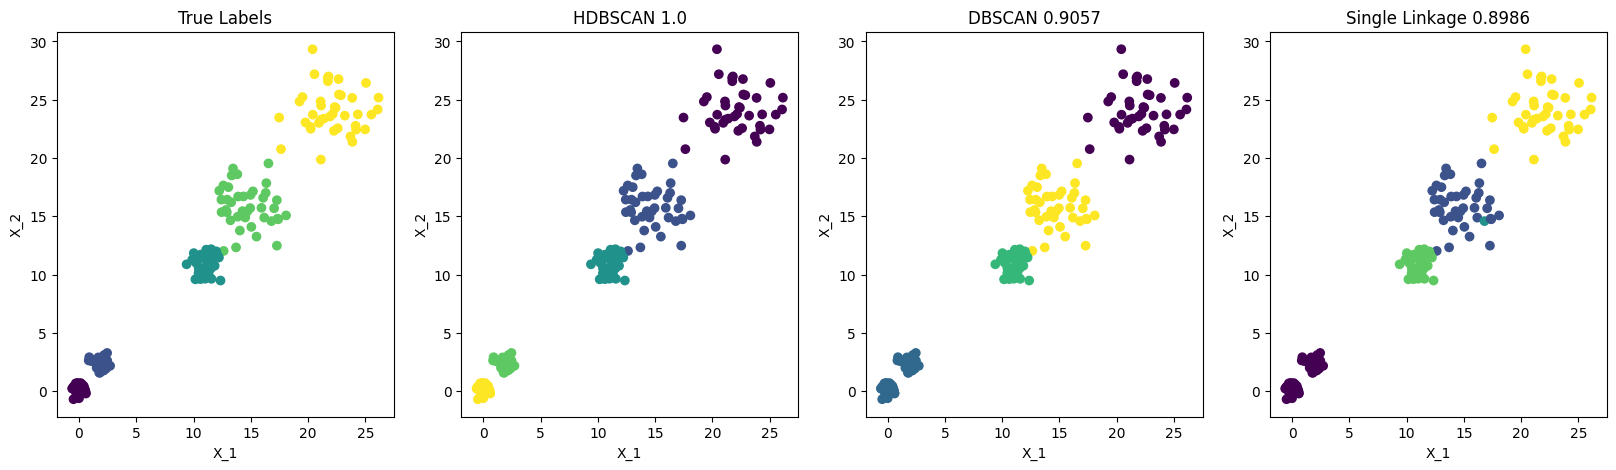

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.scatter(X_c5_dim10[:,0],X_c5_dim10[:,1],c=y_c5_dim10)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("True Labels")

plt.subplot(142)
plt.title(f"HDBSCAN {np.round(nmi_c5_dim10_hdbscan,decimals=4)}")
plt.scatter(X_c5_dim10[:,0],X_c5_dim10[:,1],c=y_c5_dim10_hdbscan)
plt.xlabel("X_1")
plt.ylabel("X_2")


plt.subplot(143)
plt.title(f"DBSCAN {np.round(nmi_c5_dim10_dbscan,decimals=4)}")
plt.scatter(X_c5_dim10[:,0],X_c5_dim10[:,1],c=y_c5_dim10_dbscan)
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.subplot(144)
plt.title(f"Single Linkage {np.round(nmi_c5_dim10_single_linkage,decimals=4)}")
plt.scatter(X_c5_dim10[:,0],X_c5_dim10[:,1],c=y_c5_dim10_single_linkage)
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.show()

No the clusters cannot be correctly detected by single linkage clustering, because outlier points of clusters can lead to some clusters getting joned, before the outlier is joined with the correct cluster.

### **d)** *Regard the following properties for all three datasets from 1-2 a, b, and c:*
- *For each cluster, compute the average distance to its mean.*
- *For each pair of clusters, compute the smallest distance between them.*
### *Discuss the similarities and dissimilarities of the distributions.*

In [21]:
def split_clusters(X,y):
    clusters = {}
    
    for point, cluster in zip(X,y):
        if cluster not in clusters:
            clusters[cluster] = point
        else:
            clusters[cluster] = np.vstack((clusters[cluster],point))

    return clusters;


def get_means(clusters):
    means = {}
    
    for cluster, points in clusters.items():    
        means[cluster] = np.zeros(points.shape[1])
        
        for point in points:
            means[cluster] += point

        means[cluster] /= len(points)
    
    return means


def get_average_mean_distances(X,y): #WIP
    clusters = split_clusters(X,y)
    means = get_means(clusters)
    average_distances = {}
    
    for cluster, points in clusters.items():
        average_distances[cluster] = np.mean(cdist(points,[means[cluster]]))
    
    return (average_distances, means, clusters)


def get_smallest_cluster_distances(X,y):
    clusters = split_clusters(X,y)
    minimal_distances = {}

    for cluster_a, points_a in clusters.items():
        for cluster_b, points_b in clusters.items():
            # skips same cluster comparisons and ensures that 
            # clusters that have already been compared are not compared again in the reverse order
            if(cluster_a >= cluster_b):
                continue

            minimal_distances[(cluster_a,cluster_b)] = np.min(cdist(points_a,points_b))

    return (minimal_distances, clusters)

def calculate_values_print_stats_1_2_d(exercise_number,X,y):
    average_mean_distances, _ , _ = get_average_mean_distances(X,y)
    minimal_distances, _ = get_smallest_cluster_distances(X,y)
    print(f"{exercise_number}: Average mean distances per cluster")
    
    for cluster, distance in average_mean_distances.items():
        print(f"\tCluster {cluster}:\t{distance}")
    
    print(f"\n{exercise_number}: Minimal distance between clusters")
    
    for clusters, distance in minimal_distances.items():
        print(f"\tClusters: {clusters[0]}, {clusters[1]}: {distance}")
                    

In [22]:
# 1-2 a)
calculate_values_print_stats_1_2_d("Exercise 1-2 a)",X_moons,y_moons)

Exercise 1-2 a): Average mean distances per cluster
	Cluster 1:	0.737447609941104
	Cluster 0:	0.7374476099411043
	Cluster 2:	0.7374476099411043
	Cluster 3:	0.737447609941104

Exercise 1-2 a): Minimal distance between clusters
	Clusters: 1, 2: 0.29320317068337803
	Clusters: 1, 3: 0.5
	Clusters: 0, 1: 0.5005135200964227
	Clusters: 0, 2: 0.5
	Clusters: 0, 3: 1.5359640240271069
	Clusters: 2, 3: 0.5005135200964227


In [23]:
# 1-2 b)
calculate_values_print_stats_1_2_d("Exercise 1-2 b)",test_data[:,:-1],test_data[:,-1])

Exercise 1-2 b): Average mean distances per cluster
	Cluster 0.0:	2.57885116062434
	Cluster 1.0:	0.6676604611215233
	Cluster 2.0:	0.7067182307184297
	Cluster 3.0:	1.6107192729880269

Exercise 1-2 b): Minimal distance between clusters
	Clusters: 0.0, 1.0: 7.855429362959059
	Clusters: 0.0, 2.0: 3.103111121097444
	Clusters: 0.0, 3.0: 4.509509438461747
	Clusters: 1.0, 2.0: 3.3077640898726104
	Clusters: 1.0, 3.0: 1.0234399008379431
	Clusters: 2.0, 3.0: 0.8788258123390458


In [24]:
# 1-2 c)
calculate_values_print_stats_1_2_d("Exercise 1-2 c)",X_c5_dim10,y_c5_dim10)

Exercise 1-2 c): Average mean distances per cluster
	Cluster 4:	6.179813319260697
	Cluster 0:	0.8933360658371299
	Cluster 2:	2.1827738602443616
	Cluster 3:	5.38761979760921
	Cluster 1:	1.2344732366821962

Exercise 1-2 c): Minimal distance between clusters
	Clusters: 0, 4: 73.7564568118255
	Clusters: 0, 2: 30.15960035991011
	Clusters: 0, 3: 44.789195105794704
	Clusters: 0, 1: 6.904959787365697
	Clusters: 2, 4: 41.933575050771985
	Clusters: 2, 3: 13.654060046320268
	Clusters: 3, 4: 24.133663239813348
	Clusters: 1, 4: 65.51891541848224
	Clusters: 1, 2: 22.147041786325197
	Clusters: 1, 3: 36.75829376846125


## **Exercise 1-3** *Evaluation*

### **a)** *Create a data set with 3 clusters and find hyperparameters for DBSCAN s.t. the standard sklearn NMI implementation results in 1.0 even though DBSCAN only detects 2 clusters (and noise).*

In [25]:
X_false_nmi, y_false_nmi = make_blobs(n_samples=200,centers=[[0.0,0.0],[3.0,3.0],[25.0,25.0]],cluster_std=[0.3,0.4,12.0])


In [26]:
# works 99.9% of the time, if it doesn't simply regenerate the dataset
dbscan_false_nmi = DBSCAN(eps=1,min_samples=12)

y_false_nmi_dbscan = dbscan_false_nmi.fit_predict(X_false_nmi)

y_false_nmi_dbscan_nmi = normalized_mutual_info_score(y_false_nmi,y_false_nmi_dbscan)

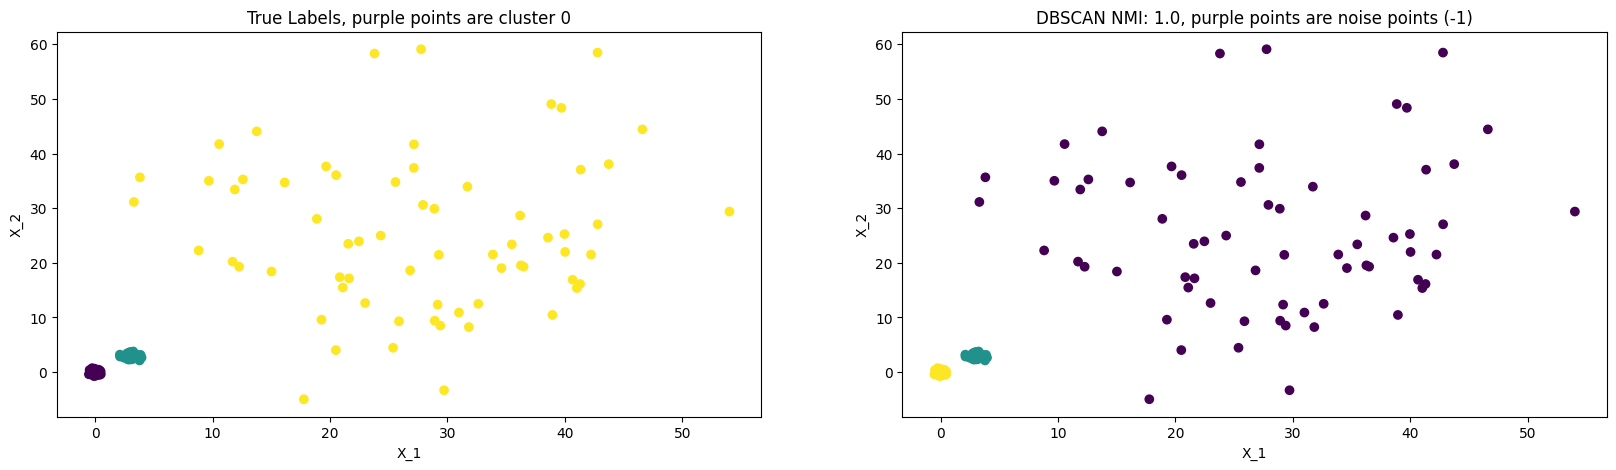

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title("True Labels, purple points are cluster 0")
plt.scatter(X_false_nmi[:,0],X_false_nmi[:,1],c=y_false_nmi)
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.subplot(122)
plt.title(f"DBSCAN NMI: {y_false_nmi_dbscan_nmi}, purple points are noise points (-1)")
plt.scatter(X_false_nmi[:,0],X_false_nmi[:,1],c=y_false_nmi_dbscan)
plt.xlabel("X_1")
plt.ylabel("X_2")


plt.show()

### **b)** *Create data and find hyperparameters for k-Means and for DBSCAN where NMI and ARI contradict. I.e., the ARI should be better for one clustering, but the NMI should be better for the other clustering. Do not count noise (labeled by DBSCAN) as one cluster! Choose any other option and justify your decision.*

In [28]:
# dataset (generated statically, because easier to demonstrate than with real data)
X_ari_nmi_low = np.array([[0,10],[1,0],[2,0],[4,0],[6,0],[14,0],[14,10]])
y_ari_nmi_low = np.array([1,0,0,0,0,0,1])

# get higher ari/lower nmi score by using fixed inits for 3 cluster k-means
kmeans_c3 = KMeans(n_clusters=3,init=[[8,0],[0,20],[14,5]])
y_ari_high_kmeans = kmeans_c3.fit_predict(X_ari_nmi_low)

# get the reverse for 5  clusters
kmeans_c5 = KMeans(n_clusters=5,init=[[1,0],[5,0],[14,0],[14,10],[0,10]])
y_ari_low_kmeans = kmeans_c5.fit_predict(X_ari_nmi_low)

y_ari_low_kmeans_ari = adjusted_rand_score(y_ari_nmi_low,y_ari_low_kmeans)
y_ari_low_kmeans_nmi = normalized_mutual_info_score(y_ari_nmi_low,y_ari_low_kmeans)
y_ari_high_kmeans_ari = adjusted_rand_score(y_ari_nmi_low,y_ari_high_kmeans)
y_ari_high_kmeans_nmi = normalized_mutual_info_score(y_ari_nmi_low,y_ari_high_kmeans)

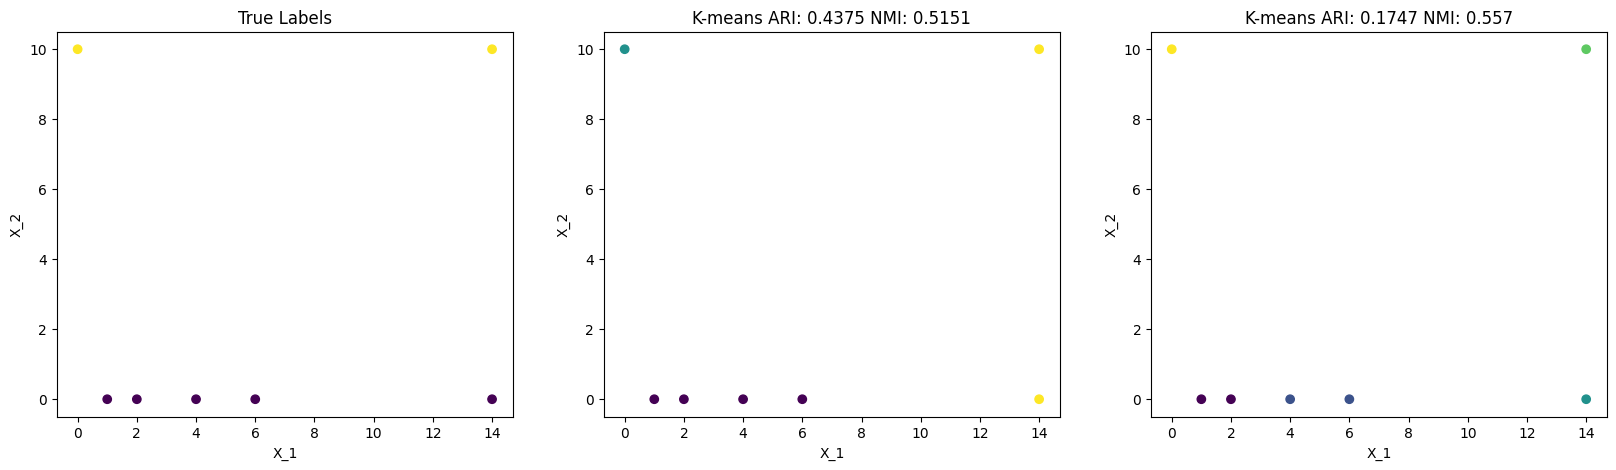

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(X_ari_nmi_low[:,0],X_ari_nmi_low[:,1],c=y_ari_nmi_low)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("True Labels")

plt.subplot(132)
plt.title(f"K-means ARI: {np.round(y_ari_high_kmeans_ari,decimals=4)} NMI: {np.round(y_ari_high_kmeans_nmi,decimals=4)}")
plt.scatter(X_ari_nmi_low[:,0],X_ari_nmi_low[:,1],c=y_ari_high_kmeans)
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.subplot(133)
plt.title(f"K-means ARI: {np.round(y_ari_low_kmeans_ari,decimals=4)} NMI: {np.round(y_ari_low_kmeans_nmi,decimals=4)}")
plt.scatter(X_ari_nmi_low[:,0],X_ari_nmi_low[:,1],c=y_ari_low_kmeans)
plt.xlabel("X_1")
plt.ylabel("X_2")


plt.show()

In [30]:
# higher ari
dbscan_ari_high = DBSCAN(eps=10,min_samples=1)

# higher nmi
dbscan_ari_low = DBSCAN(eps=1,min_samples=1)

# calculate stuff
y_ari_high_dbscan = dbscan_ari_high.fit_predict(X_ari_nmi_low)
y_ari_low_dbscan = dbscan_ari_low.fit_predict(X_ari_nmi_low)


# calculate ari/nmi
y_ari_high_dbscan_ari = adjusted_rand_score(y_ari_nmi_low,y_ari_high_dbscan)
y_ari_high_dbscan_nmi = normalized_mutual_info_score(y_ari_nmi_low,y_ari_high_dbscan)
y_ari_low_dbscan_ari = adjusted_rand_score(y_ari_nmi_low,y_ari_low_dbscan)
y_ari_low_dbscan_nmi = normalized_mutual_info_score(y_ari_nmi_low,y_ari_low_dbscan)

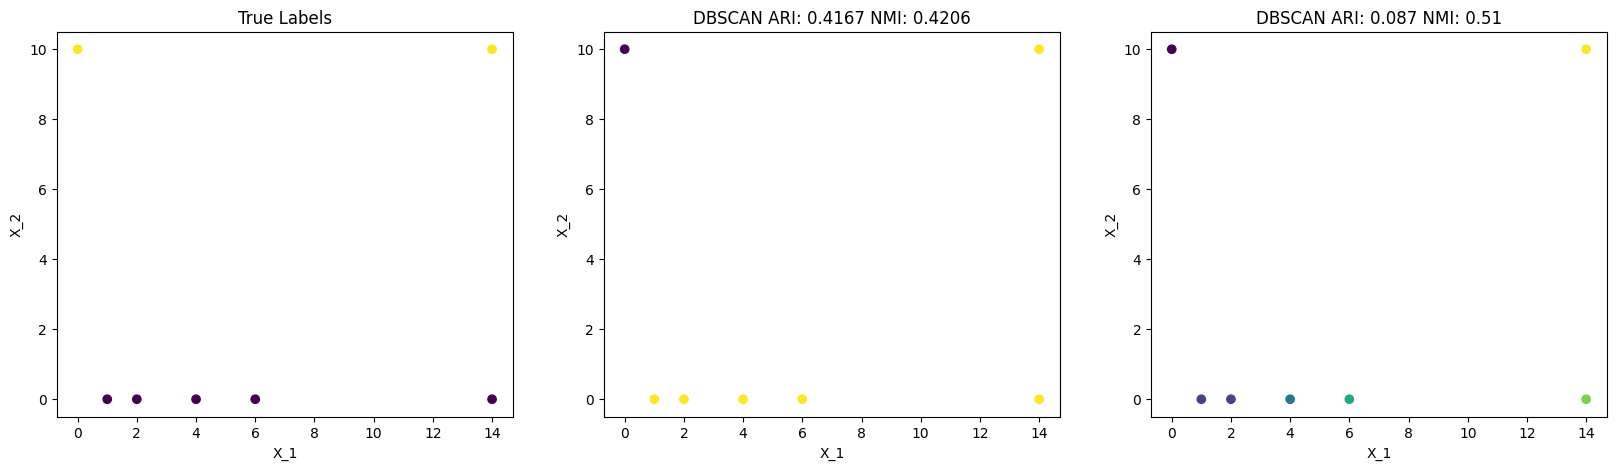

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(X_ari_nmi_low[:,0],X_ari_nmi_low[:,1],c=y_ari_nmi_low)
plt.xlabel("X_1")
plt.ylabel("X_2")
plt.title("True Labels")

plt.subplot(132)
plt.title(f"DBSCAN ARI: {np.round(y_ari_high_dbscan_ari,decimals=4)} NMI: {np.round(y_ari_high_dbscan_nmi,decimals=4)}")
plt.scatter(X_ari_nmi_low[:,0],X_ari_nmi_low[:,1],c=y_ari_high_dbscan)
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.subplot(133)
plt.title(f"DBSCAN ARI: {np.round(y_ari_low_dbscan_ari,decimals=4)} NMI: {np.round(y_ari_low_dbscan_nmi,decimals=4)}")
plt.scatter(X_ari_nmi_low[:,0],X_ari_nmi_low[:,1],c=y_ari_low_dbscan)
plt.xlabel("X_1")
plt.ylabel("X_2")

plt.show()

### **c)** *Implement the Silhouette Coefficient with the Manhattan distance instead of the Euclidean distance. In how far does it give different results?*

In [32]:
def print_silhuette_and_dataset(X,y):
    print(f"Silhuette Coefficient (Euclidean): {silhouette_score(X,y,metric="euclidean")}")
    print(f"Silhuette Coefficient (Manhattan): {silhouette_score(X,y,metric="manhattan")}")
    plt.scatter(X[:,0], X[:,1],c=y)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

In [33]:
X_silhuette_equal = np.array([[0.0,1.0],[0.0,2.0],[0.0,3.0],[0.0,4.0],[0.0,7.0],[0.0,8.0],[0.0,9.0],[0.0,10.0]])
y_silhuette_equal = np.array([0,0,0,0,1,1,1,1])

X_silhuette_manhattan = np.array([[0.0,1.0],[1.0,2.0],[0.0,3.0],[1.0,4.0],[13.0,1.0],[12.0,2.0],[13.0,3.0],[12.0,4.0]])
y_silhuette_manhattan = np.array([0,0,0,0,1,1,1,1])

X_silhuette_euclidean = np.array([[0.0,1.0],[1.0,2.0],[0.0,3.0],[1.0,4.0],[3.0,1.0],[2.0,2.0],[3.0,3.0],[2.0,4.0]])
y_silhuette_euclidean = np.array([0,0,0,0,1,1,1,1])

Silhuette Coefficient (Euclidean): 0.2283031097469339
Silhuette Coefficient (Manhattan): 0.2682539682539683


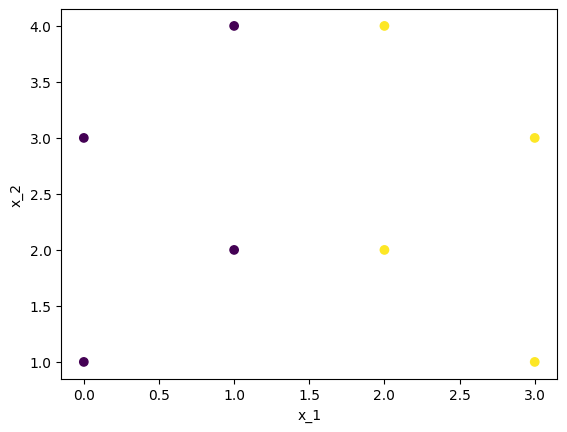

In [34]:
print_silhuette_and_dataset(X_silhuette_euclidean,y_silhuette_euclidean)

Silhuette Coefficient (Euclidean): 0.7103341103341103
Silhuette Coefficient (Manhattan): 0.7103341103341103


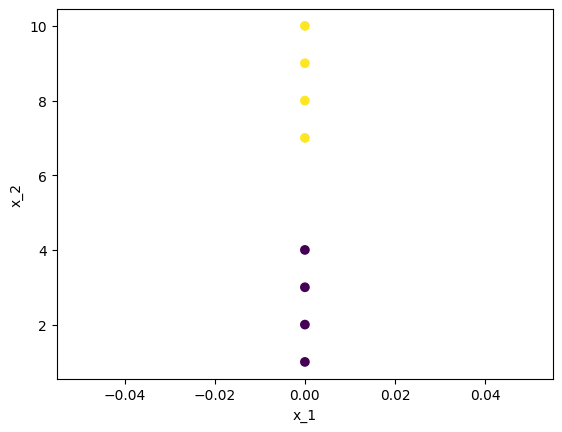

In [35]:
print_silhuette_and_dataset(X_silhuette_equal,y_silhuette_equal)

Silhuette Coefficient (Euclidean): 0.8427671603162721
Silhuette Coefficient (Manhattan): 0.8240618640618641


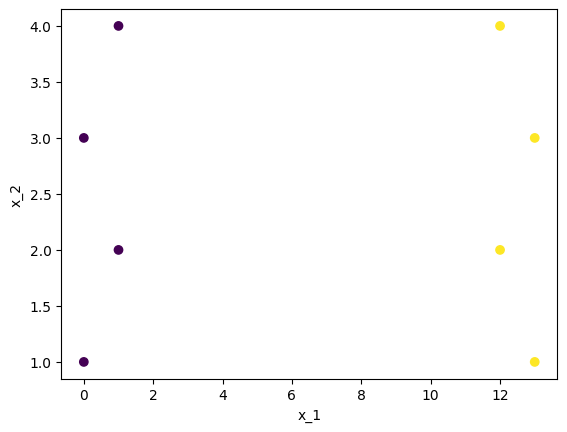

In [36]:
print_silhuette_and_dataset(X_silhuette_manhattan,y_silhuette_manhattan)